In [1]:
import os 
import warnings 

import pandas as pd
import numpy as np
import datetime as dt

import seaborn as sns
sns.set_style('whitegrid')
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected = True)
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
%matplotlib inline

warnings.filterwarnings('ignore')


pd.set_option('display.max_columns', None)
pd.set_option('display.width', 600)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Import Dataset -->

In [2]:
dataset = pd.read_csv('./persona.csv')

In [3]:
df = dataset.copy()

In [4]:
df.head()

,PRICE,SOURCE,SEX,COUNTRY,AGE
0,39,android,male,bra,17
1,39,android,male,bra,17
2,49,android,male,bra,17
3,29,android,male,tur,17
4,49,android,male,tur,17


In [5]:
def column_grab(dataframe):
  
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O" and str(df[col].dtypes) in ["int64","float64"]]
    return cat_cols,num_cols

In [6]:
column_grab(df)

(['SOURCE', 'SEX', 'COUNTRY'], ['PRICE', 'AGE'])

In [7]:
cat_cols, num_cols= column_grab(df)

# Explatory Data Analytics Session >

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   PRICE    5000 non-null   int64 
 1   SOURCE   5000 non-null   object
 2   SEX      5000 non-null   object
 3   COUNTRY  5000 non-null   object
 4   AGE      5000 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 234.4+ KB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PRICE,5000.000,34.132,12.465,9.000,29.000,39.000,39.000,59.000
AGE,5000.000,23.581,8.996,15.000,17.000,21.000,27.000,66.000


In [10]:
def cat_summary(dataframe, plot = False):
    for col_name in cat_cols:
        print("############## Unique Observations of Categorical Data ###############")
        print("The unique number of "+ col_name+": "+ str(dataframe[col_name].nunique()))

        print("############## Frequency of Categorical Data ########################")
        print(pd.DataFrame({col_name : dataframe[col_name].value_counts(),
                            "Ratio": dataframe[col_name].value_counts() / len(dataframe)}))
        if plot == True:
            rgb_values = sns.color_palette("Set2", 6)
            sns.set_theme(style="darkgrid")
            ax = sns.countplot(x = dataframe[col_name], data = dataframe, palette= rgb_values)
            for p in ax.patches:
                ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=10)
            plt.show()

############## Unique Observations of Categorical Data ###############
The unique number of SOURCE: 2
############## Frequency of Categorical Data ########################
         SOURCE  Ratio
android    2974  0.595
ios        2026  0.405


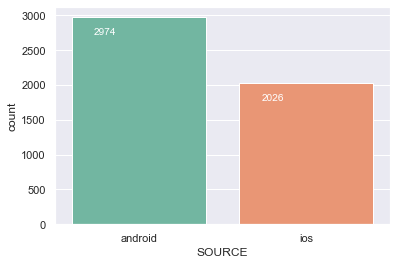

############## Unique Observations of Categorical Data ###############
The unique number of SEX: 2
############## Frequency of Categorical Data ########################
         SEX  Ratio
female  2621  0.524
male    2379  0.476


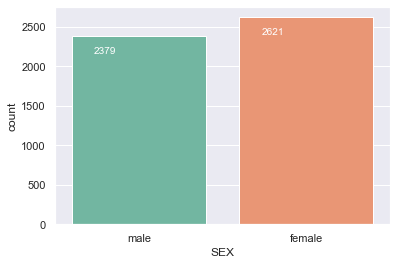

############## Unique Observations of Categorical Data ###############
The unique number of COUNTRY: 6
############## Frequency of Categorical Data ########################
     COUNTRY  Ratio
usa     2065  0.413
bra     1496  0.299
deu      455  0.091
tur      451  0.090
fra      303  0.061
can      230  0.046


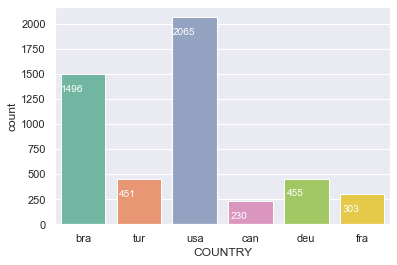

In [11]:
cat_summary(df, plot = True)

In [12]:
def num_summary(dataframe, plot=False):
    quantiles = [0.10, 0.25, 0.50, 0.75, 0.99, 1]
    for col_name in num_cols:
        print("//////////// Summary Statistics of " + col_name + "\\\\\\\\\\\\" )
        print(dataframe[col_name].describe(quantiles).T)

        if plot:
            sns.histplot(data = dataframe , x = col_name)
            plt.xlabel(col_name)
            plt.title("The Distribution of " + col_name)
            plt.grid(True)
            plt.show(block = True)

//////////// Summary Statistics of PRICE\\\\\\
count   5000.000
mean      34.132
std       12.465
min        9.000
10%       19.000
25%       29.000
50%       39.000
75%       39.000
99%       59.000
100%      59.000
max       59.000
Name: PRICE, dtype: float64


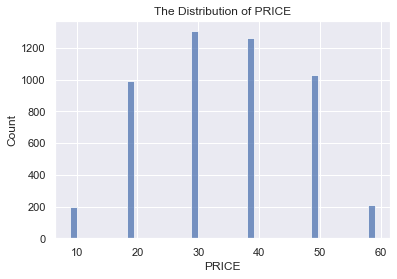

//////////// Summary Statistics of AGE\\\\\\
count   5000.000
mean      23.581
std        8.996
min       15.000
10%       15.000
25%       17.000
50%       21.000
75%       27.000
99%       53.000
100%      66.000
max       66.000
Name: AGE, dtype: float64


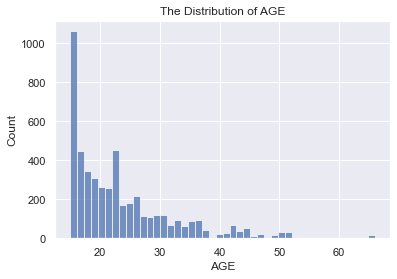

In [13]:
num_summary(df, plot= True)

## Ilk soru olarak, ulkelere gore satislardan ne kadar kazanc elde edilmis ?

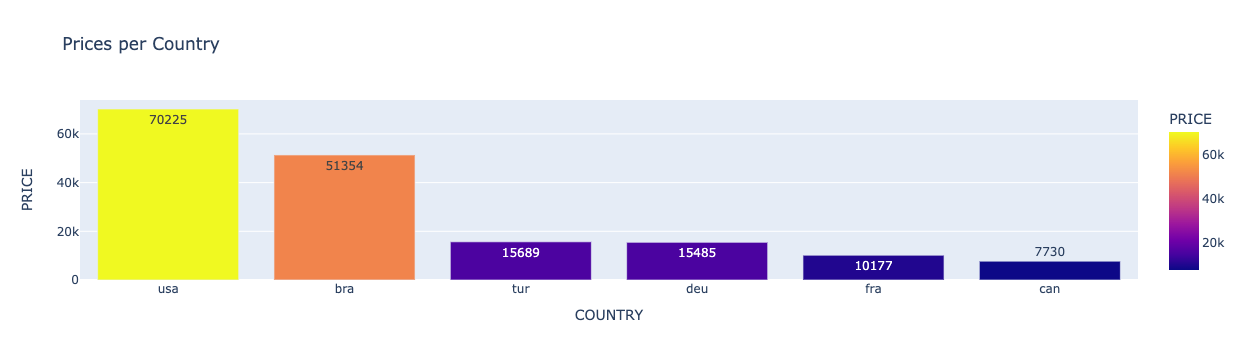

In [18]:
df_price_per_country= df.groupby('COUNTRY').agg({'PRICE':'sum'}).reset_index().sort_values(by = 'PRICE', ascending = False)
import plotly.express as px
fig = px.bar(df_price_per_country, x="COUNTRY", y="PRICE",color = 'PRICE',text = 'PRICE', title="Prices per Country")
fig.show()

In [19]:
df_price_per_country

,COUNTRY,PRICE
5,usa,70225
0,bra,51354
4,tur,15689
2,deu,15485
3,fra,10177
1,can,7730


## Ulkelere gore satis ortalamalari nedir ?

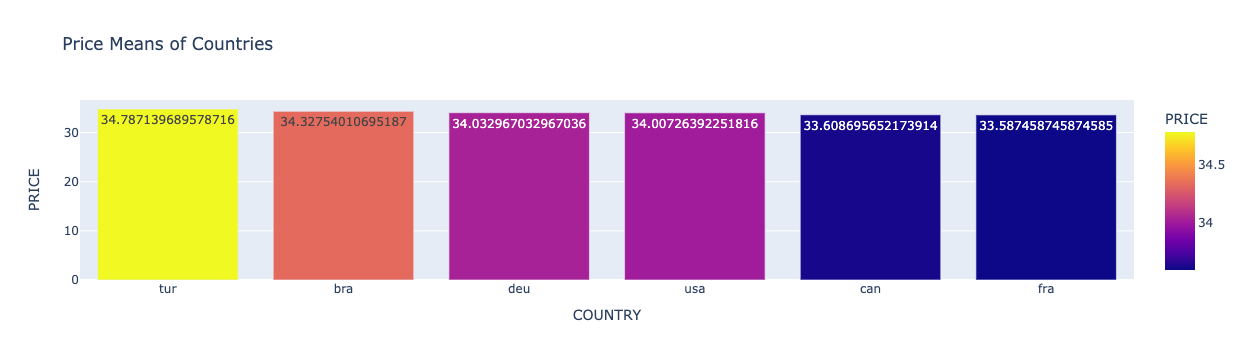

In [104]:
df_pricemean = df.groupby('COUNTRY').agg({'PRICE':'mean'}).reset_index().sort_values(by = 'PRICE', ascending = False)
import plotly.express as px
fig = px.bar(df_pricemean, x="COUNTRY", y="PRICE",color = 'PRICE', text = 'PRICE' ,title="Price Means of Countries")
fig.show()

## Diger bir soru olarak Source kategorisi ve Price degiskeni kirilimina bakiyoruz. Hangi source dan elde ettigimiz kazanc daha fazladir ?

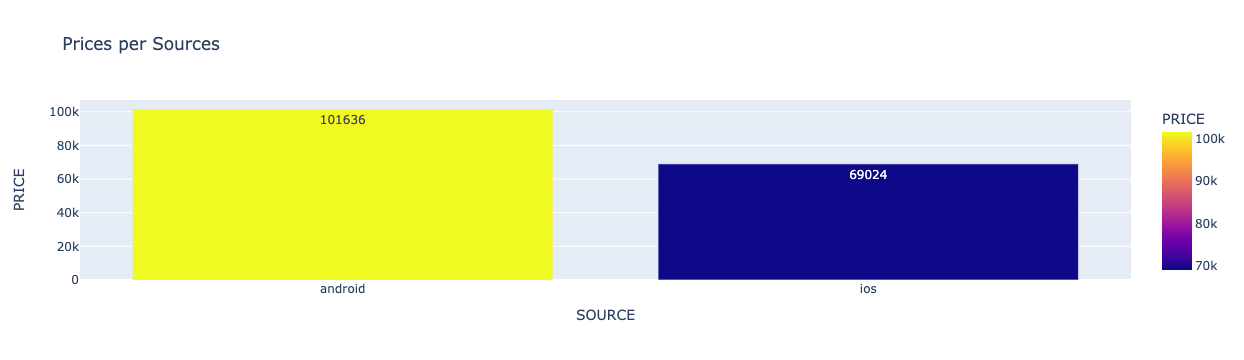

In [19]:
df_price_per_source= df.groupby('SOURCE').agg({'PRICE':'sum'}).reset_index().sort_values(by = 'PRICE', ascending = False)
import plotly.express as px
fig = px.bar(df_price_per_source, x="SOURCE", y="PRICE",color = 'PRICE',text = 'PRICE',title="Prices per Sources")
fig.show()

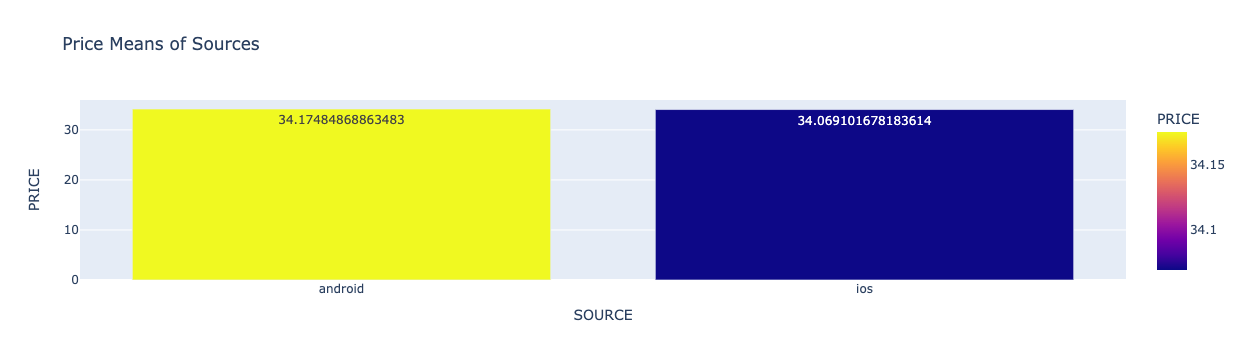

In [21]:
df_pricemean_source= df.groupby('SOURCE').agg({'PRICE':'mean'}).reset_index().sort_values(by = 'PRICE', ascending = False)
import plotly.express as px
fig = px.bar(df_pricemean_source, x="SOURCE", y="PRICE",color = 'PRICE',text = 'PRICE',title="Price Means of Sources")
fig.show()

## Veri setindeki erkek ve kadinlarin yas degisimi nasildir ?

In [16]:
df_pivot = pd.pivot_table(df, values = 'AGE', index = ['COUNTRY','SOURCE'], columns = 'SEX', aggfunc = np.mean).reset_index()
df_pivot

SEX,COUNTRY,SOURCE,female,male
0,bra,android,23.790,23.158
1,bra,ios,25.715,23.996
2,can,android,23.837,26.064
3,can,ios,20.200,22.438
4,deu,android,24.583,23.676
5,deu,ios,17.871,28.722
6,fra,android,19.523,25.653
7,fra,ios,22.810,24.012
8,tur,android,24.090,23.613
9,tur,ios,23.520,23.371


In [20]:
test_stat, pvalue = shapiro(df.loc[df['SEX'] == 'male' , 'AGE'])
print('Test stat = %.4f' %(test_stat, pvalue))

NameError: name 'shapiro' is not defined

## Veri setindeki erkek ve kadinlarin harcamalari arasinda fark var midir ?

In [17]:
df_pivot_2 = pd.pivot_table(df, values = 'PRICE', index = ['COUNTRY','SOURCE'], columns = 'SEX', aggfunc = np.mean).reset_index()
df_pivot_2

SEX,COUNTRY,SOURCE,female,male
0,bra,android,34.685,34.084
1,bra,ios,34.323,34.126
2,can,android,31.750,36.021
3,can,ios,32.667,34.479
4,deu,android,33.094,34.563
5,deu,ios,34.758,33.074
6,fra,android,34.568,34.000
7,fra,ios,31.381,33.875
8,tur,android,35.474,37.800
9,tur,ios,33.634,32.814


## COUNTRY-SOURCE kırılımında PRICE ortalamaları nedir?

In [24]:
csource = pd.pivot_table(df, values = 'PRICE', index = 'COUNTRY', columns = 'SOURCE', aggfunc = np.mean).reset_index()
csource

SOURCE,COUNTRY,android,ios
0,bra,34.387,34.222
1,can,33.331,33.951
2,deu,33.870,34.269
3,fra,34.312,32.776
4,tur,36.229,33.273
5,usa,33.760,34.372


In [26]:
df_count_source = df.groupby(['COUNTRY','SOURCE']).agg({'PRICE':'mean'}).reset_index()

In [27]:
df_count_source

,COUNTRY,SOURCE,PRICE
0,bra,android,34.387
1,bra,ios,34.222
2,can,android,33.331
3,can,ios,33.951
4,deu,android,33.870
5,deu,ios,34.269
6,fra,android,34.312
7,fra,ios,32.776
8,tur,android,36.229
9,tur,ios,33.273


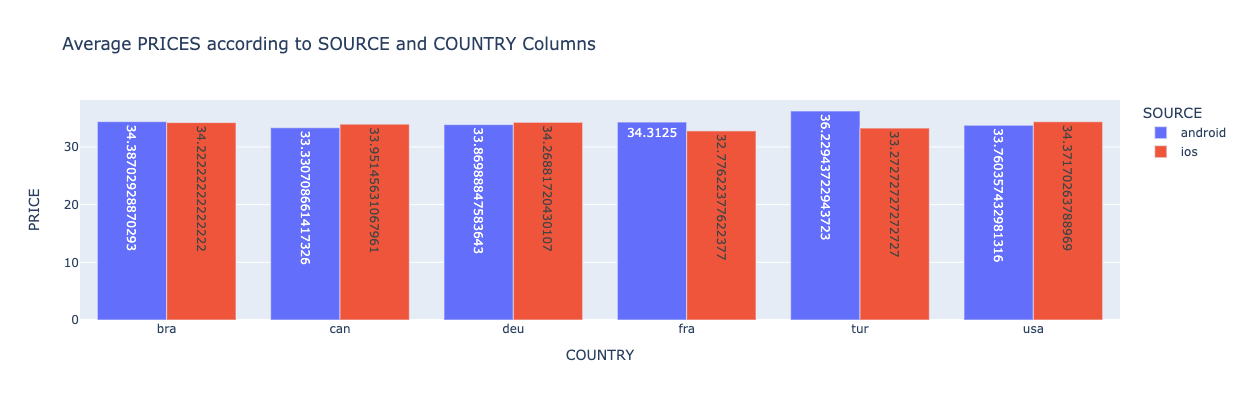

In [28]:
import plotly.express as px
fig = px.bar(df_count_source, x="COUNTRY", y="PRICE",
             color='SOURCE', barmode='group', text= 'PRICE', title = 'Average PRICES according to SOURCE and COUNTRY Columns',
             height=400)
fig.show()

## SOURCE_SEX kırılımında PRICE ortalamaları nedir?

In [49]:
df_count_source = df.groupby(['COUNTRY','SOURCE','SEX']).agg({'PRICE':'mean'}).reset_index()

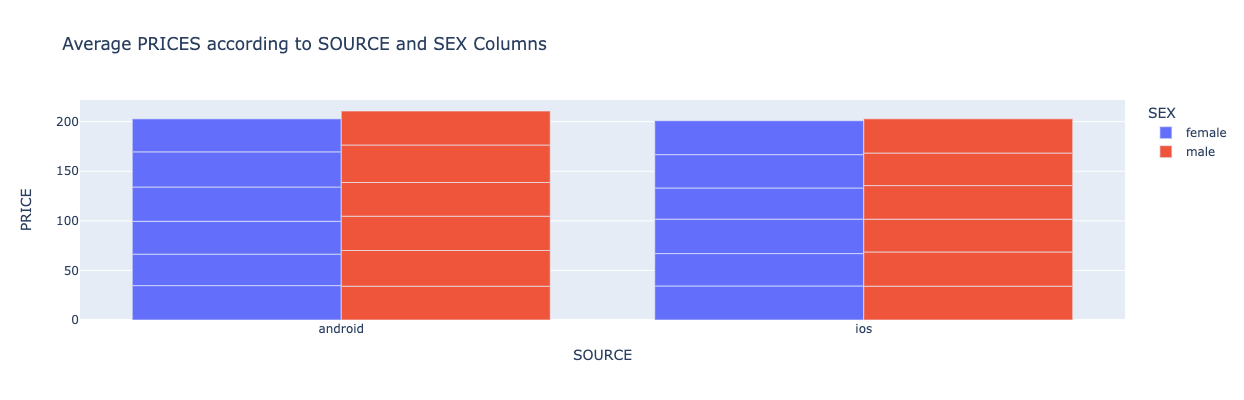

In [54]:
import plotly.express as px
fig = px.bar(df_count_source, x="SOURCE", y="PRICE",
             color='SEX', barmode='group', title = 'Average PRICES according to SOURCE and SEX Columns',
             height=400)
fig.show()

In [59]:
df_all = df.groupby(['COUNTRY','SOURCE','SEX', 'AGE']).agg({'PRICE':'mean'}).reset_index().sort_values(by = 'PRICE', ascending = False)

In [60]:
df_all

,COUNTRY,SOURCE,SEX,AGE,PRICE
47,bra,android,male,46,59.000
290,usa,android,male,36,59.000
167,fra,android,female,24,59.000
339,usa,ios,male,32,54.000
125,deu,android,female,36,49.000
...,...,...,...,...,...
319,usa,ios,female,38,19.000
315,usa,ios,female,30,19.000
97,can,android,female,27,19.000
171,fra,android,male,18,19.000
